In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# MNIST IMAGE --> Tensors

In [9]:
transform = transforms.ToTensor()

In [10]:
train_data = datasets.MNIST(root="/Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data",
                           train=True, download=True, transform=transform)

In [11]:
test_data = datasets.MNIST(root="/Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data",
                          train=False, download=True, transform=transform)

In [12]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: /Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [13]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: /Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [14]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [15]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [16]:
image,label = train_data[0]

In [17]:
# 1 means grayscale image, singe color channel for black and white
image.shape

torch.Size([1, 28, 28])

In [18]:
label

5

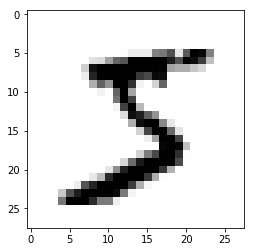

In [21]:
plt.imshow(image.reshape((28,28)),cmap='gist_yarg')   # Default color mapping called viridis

In [22]:
torch.manual_seed(101)

# Shuffle train data at each epoch to prevent sorted 0 images, 1 images, ...
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)

test_loader = DataLoader(test_data,batch_size=500,shuffle=False)

In [23]:
# Visualize some images
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # FORMATTING

In [24]:
# First Batch
for images,labels in train_loader:
    break

In [25]:
images.shape

torch.Size([100, 1, 28, 28])

In [26]:
labels.shape

torch.Size([100])

In [28]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

Labels:  [   0    5    7    8    6    7    9    7    1    3    8    4]


Labels:  [   0    5    7    8    6    7    9    7    1    3    8    4]


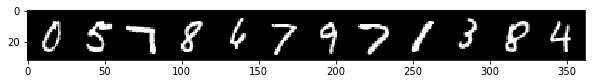

In [27]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)   # the default nrow is 8
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH(color channel, width, height) to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [29]:
class MultilayerPerceptron(nn.Module):
    
    def __init__(self,in_sz=784, out_sz=10, layers=[120,84]):      # 784=28x28, 10: 0 to 9
        
        super().__init__()
        
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
        
    def forward(self,X):
        
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X,dim=1)  # MULTI CLASS CLASSIFICATION

In [30]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [31]:
# ANN ---> CNN
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [32]:
# 105,214 total parameters

In [33]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [34]:
images.shape # Want to transform to [100,784]

torch.Size([100, 1, 28, 28])

In [36]:
images.view(100,-1).shape

torch.Size([100, 784])

In [40]:
import time
start_time = time.time()

# Training

epochs = 10

# Trackers
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    for b, (X_train,y_train) in enumerate(train_loader):
        
        b+=1
        
        # 10 Neurons:
        #[0.1,0.0,...,0.8] ---> 9
        y_pred = model(X_train.view(100,-1))    # Flatten data
        loss = criterion(y_pred,y_train)
        
        predicted = torch.max(y_pred.data,1)[1]   # print(y_pred.data) for better understanding
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200 == 0:
            acc = trn_corr.item()*100/(100*b)
            print(f'Epoch {i}  batch{b} loss:{loss.item()}  accuracy:{acc}')
            
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    
    with torch.no_grad():
        
        for b, (X_test,y_test) in enumerate(test_loader):
            
            y_val = model(X_test.view(500,-1))
            
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted==y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        

total_time = time.time() - start_time
print(f'Duration: {total_time/60} mins')

Epoch 0  batch200 loss:0.053589124232530594  accuracy:97.475
Epoch 0  batch400 loss:0.05533469840884209  accuracy:97.485
Epoch 0  batch600 loss:0.05724065750837326  accuracy:97.51
Epoch 1  batch200 loss:0.12786853313446045  accuracy:97.95
Epoch 1  batch400 loss:0.09470902383327484  accuracy:98.005
Epoch 1  batch600 loss:0.12126529961824417  accuracy:98.04333333333334
Epoch 2  batch200 loss:0.042189911007881165  accuracy:98.345
Epoch 2  batch400 loss:0.042974863201379776  accuracy:98.3825
Epoch 2  batch600 loss:0.052484817802906036  accuracy:98.385
Epoch 3  batch200 loss:0.0030266372486948967  accuracy:99.035
Epoch 3  batch400 loss:0.058178991079330444  accuracy:98.865
Epoch 3  batch600 loss:0.064924456179142  accuracy:98.72166666666666
Epoch 4  batch200 loss:0.03981542959809303  accuracy:99.135
Epoch 4  batch400 loss:0.029990606009960175  accuracy:99.065
Epoch 4  batch600 loss:0.05823533609509468  accuracy:98.98
Epoch 5  batch200 loss:0.011188242584466934  accuracy:99.335
Epoch 5  batc

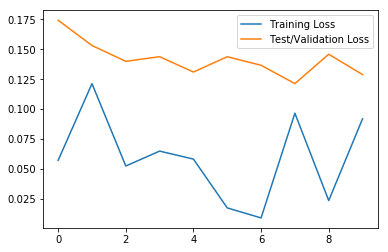

In [42]:
# It is normal to have higher losses in test data than in train data
plt.plot(train_losses,label='Training Loss')
plt.plot(test_losses,label='Test/Validation Loss')
plt.legend()

In [45]:
train_correct[0]#/600

tensor(58506)

In [46]:
train_correct[0]/600

tensor(97)

In [47]:
train_acc = [t/600 for t in train_correct]

In [48]:
test_acc = [t/100 for t in test_correct]

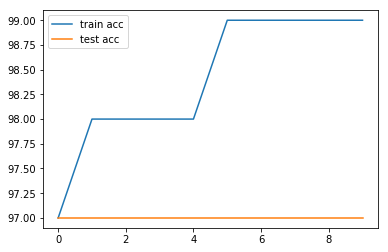

In [49]:
plt.plot(train_acc,label='train acc')
plt.plot(test_acc,label='test acc')
plt.legend()

In [50]:
# New Unseen Data

test_load_all = DataLoader(test_data,batch_size=10000,shuffle=False)

In [52]:
with torch.no_grad():
    correct = 0
    
    for X_test,y_test in test_load_all:
        y_val = model(X_test.view(len(X_test),-1))
        predicted = torch.max(y_val,1)[1]
        correct += (predicted==y_test).sum()

In [53]:
correct

tensor(9777)

In [54]:
correct.item()

9777

In [55]:
100*correct.item()/len(test_data)

97.77

In [56]:
confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[ 973,    0,    3,    0,    0,    2,    4,    1,    6,    2],
       [   0, 1126,    3,    0,    0,    0,    4,    7,    0,    2],
       [   2,    3, 1007,    4,    1,    0,    1,   10,    2,    0],
       [   1,    1,    4,  979,    0,    6,    0,    4,    6,    0],
       [   0,    0,    2,    0,  969,    2,    8,    7,    5,    7],
       [   1,    1,    0,    8,    0,  875,   14,    0,    7,    3],
       [   1,    2,    1,    0,    2,    2,  927,    0,    0,    0],
       [   0,    0,    5,    4,    0,    1,    0,  988,    3,    0],
       [   1,    2,    6,    3,    0,    1,    0,    1,  940,    2],
       [   1,    0,    1,   12,   10,    3,    0,   10,    5,  993]])

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.ToTensor()

In [3]:
train_data = datasets.MNIST(root="/Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data",
                           train=True, download=True, transform=transform)

In [4]:
test_data = datasets.MNIST(root="/Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data",
                           train=False, download=True, transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: /Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: /Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [7]:
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)

In [8]:
conv1 = nn.Conv2d(1,6,3,1)      # 1 Color Channel; 6: 6 filters; 3: 3x3 filters; 1: Stride=1
conv2 = nn.Conv2d(6,16,3,1)     # 6 Color Channels from 6 filters in conv1

In [9]:
for i, (X_train,y_train) in enumerate(train_data):
    break

In [10]:
X_train.shape  # Convert to a 4D batch (batch of 1 image)

torch.Size([1, 28, 28])

In [11]:
X_train.view(1,1,28,28)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
x = X_train.view(1,1,28,28)

In [13]:
x = F.relu(conv1(x))

In [14]:
x.shape     # 26 because losing border pixels by setting padding = 0

torch.Size([1, 6, 26, 26])

In [15]:
x = F.max_pool2d(x,2,2)     # 2: kernel size; 2: stride size

In [16]:
x.shape     # 13=26/2 after max pooling

torch.Size([1, 6, 13, 13])

In [17]:
x = F.relu(conv2(x))

In [18]:
x.shape

torch.Size([1, 16, 11, 11])

In [19]:
x = F.max_pool2d(x,2,2)

In [20]:
x.shape

torch.Size([1, 16, 5, 5])

In [21]:
((28-2)/2-2)/2

5.5

In [22]:
# Fit into a flat layer
x.view(-1,16*5*5).shape       # -1: Keep the first dimension

torch.Size([1, 400])

In [23]:
class ConvolutionalNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)           # 6,16,120,84 are arbitrary numbers; 10: 10 classes
        
    def forward(self,X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,16*5*5)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X,dim=1)

In [24]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [25]:
for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [27]:
import time
start_time = time.time()

# Variables (Trackers)
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For loop epochs
for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    #Train
    for b,(X_train,y_train) in enumerate(train_loader):
        b+=1
        
        y_pred = model(X_train) # No need to flatten! Just fit in the 2D image data
        loss = criterion(y_pred,y_train)
        
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum() # True 1/False 0 sum()
        trn_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%600 == 0:
            print(f"EPOCH: {i} BATCH: {b} LOSS: {loss.item()}")
            
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    # Test
    with torch.no_grad():
        for b,(X_test,y_test) in enumerate(test_loader):
            
            y_val = model(X_test)
            
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f"Training took {total/60} minutes")

EPOCH: 0 BATCH: 600 LOSS: 0.21188488602638245
EPOCH: 0 BATCH: 1200 LOSS: 0.5625972747802734
EPOCH: 0 BATCH: 1800 LOSS: 0.05081814527511597
EPOCH: 0 BATCH: 2400 LOSS: 0.03108222410082817
EPOCH: 0 BATCH: 3000 LOSS: 0.013016236945986748
EPOCH: 0 BATCH: 3600 LOSS: 0.004205415025353432
EPOCH: 0 BATCH: 4200 LOSS: 0.06341783702373505
EPOCH: 0 BATCH: 4800 LOSS: 0.0012935786508023739
EPOCH: 0 BATCH: 5400 LOSS: 0.00021617618040181696
EPOCH: 0 BATCH: 6000 LOSS: 0.005800708197057247
EPOCH: 1 BATCH: 600 LOSS: 0.07639529556035995
EPOCH: 1 BATCH: 1200 LOSS: 0.2921389937400818
EPOCH: 1 BATCH: 1800 LOSS: 0.21624720096588135
EPOCH: 1 BATCH: 2400 LOSS: 0.0014681947650387883
EPOCH: 1 BATCH: 3000 LOSS: 0.003303912002593279
EPOCH: 1 BATCH: 3600 LOSS: 0.26091405749320984
EPOCH: 1 BATCH: 4200 LOSS: 0.008161790668964386
EPOCH: 1 BATCH: 4800 LOSS: 0.17031584680080414
EPOCH: 1 BATCH: 5400 LOSS: 0.011733444407582283
EPOCH: 1 BATCH: 6000 LOSS: 0.024321677163243294
EPOCH: 2 BATCH: 600 LOSS: 0.003357737557962537
EPO

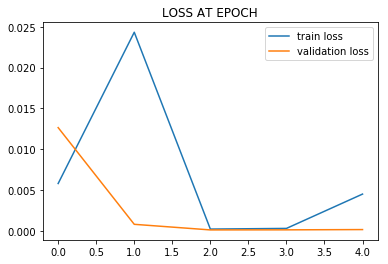

In [28]:
plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'validation loss')
plt.title('LOSS AT EPOCH')
plt.legend()

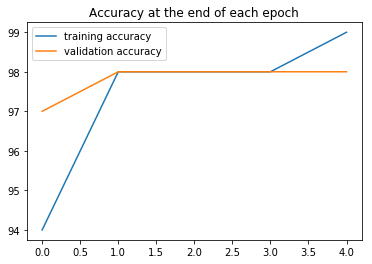

In [29]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [30]:
test_load_all = DataLoader(test_data,batch_size=10000,shuffle=False)

In [31]:
with torch.no_grad():
    correct = 0
    for X_test,y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [33]:
correct.item()/len(test_data)

0.9844

In [34]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 977    0    2    0    0    2    7    2   10    1]
 [   0 1127   10    0    0    0    3    3    0    0]
 [   0    0 1002    0    0    0    0    3    4    0]
 [   0    0   10 1007    0   15    0    1    5    8]
 [   0    0    1    0  964    0    1    0    0    1]
 [   0    2    0    2    0  874    1    0    0    3]
 [   1    1    1    0    6    1  943    0    2    0]
 [   1    3    6    1    0    0    0 1016    2    3]
 [   1    2    0    0    3    0    3    1  950    9]
 [   0    0    0    0    9    0    0    2    1  984]]


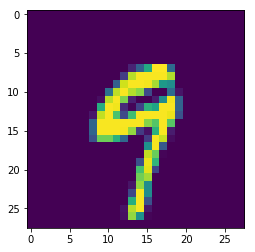

In [35]:
plt.imshow(test_data[2019][0].reshape(28,28))

In [36]:
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[2019][0].view(1,1,28,28))

In [37]:
new_prediction

tensor([[-1.9616e+01, -2.0913e+01, -1.6722e+01, -1.3216e+01, -5.8012e+00,
         -1.3603e+01, -2.1156e+01, -1.2473e+01, -1.1904e+01, -3.0422e-03]])

In [38]:
new_prediction.argmax()

tensor(9)

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import seaborn as sn  # for heatmaps
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
transform = transforms.ToTensor()

In [41]:
train_data = datasets.CIFAR10(root="/Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data",
                             train=True, download=True,transform=transform)

99.1%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [42]:
test_data = datasets.CIFAR10(root="/Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data",
                             train=False, download=True,transform=transform)

Files already downloaded and verified


In [43]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: /Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [44]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Split: test
    Root Location: /Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [45]:
torch.manual_seed(101)
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)

In [46]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

In [47]:
# First batch of images
for images,labels in train_loader:
    break

In [48]:
labels

tensor([3, 2, 0, 4, 9, 5, 1, 2, 4, 8])

Label: [   3    2    0    4    9    5    1    2    4    8]
Class:   cat  bird plane  deer truck   dog   car  bird  deer  ship


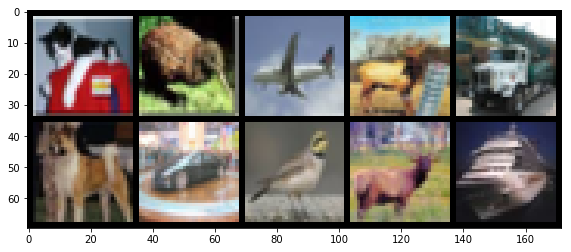

In [50]:
# Print the labels
print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images,nrow=5)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [51]:
images[0].shape

torch.Size([3, 32, 32])

In [52]:
class ConvolutionalNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5,1)     # 3: 3 color channels
        self.conv2 = nn.Conv2d(6,16,3,1)     # 6: 6 filters
        self.fc1 = nn.Linear(6*6*16,120)     # 6: ((32-2)/2-2)/2 = 6.5
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,6*6*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X,dim=1)

In [53]:
torch.manual_seed(101)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [54]:
for param in model.parameters():
    print(param.numel())

450
6
864
16
69120
120
10080
84
840
10


In [55]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [56]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%1000 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/50000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch: 1000 [ 10000/50000]  loss: 1.64100230  accuracy:  26.990%
epoch:  0  batch: 2000 [ 20000/50000]  loss: 1.46634102  accuracy:  32.660%
epoch:  0  batch: 3000 [ 30000/50000]  loss: 1.80157316  accuracy:  36.097%
epoch:  0  batch: 4000 [ 40000/50000]  loss: 1.60186934  accuracy:  38.528%
epoch:  0  batch: 5000 [ 50000/50000]  loss: 2.29330373  accuracy:  40.306%
epoch:  1  batch: 1000 [ 10000/50000]  loss: 1.27643359  accuracy:  49.820%
epoch:  1  batch: 2000 [ 20000/50000]  loss: 1.79436970  accuracy:  50.035%
epoch:  1  batch: 3000 [ 30000/50000]  loss: 0.66624010  accuracy:  50.293%
epoch:  1  batch: 4000 [ 40000/50000]  loss: 1.26178539  accuracy:  50.748%
epoch:  1  batch: 5000 [ 50000/50000]  loss: 1.72601068  accuracy:  51.252%
epoch:  2  batch: 1000 [ 10000/50000]  loss: 0.67859113  accuracy:  55.130%
epoch:  2  batch: 2000 [ 20000/50000]  loss: 1.15070176  accuracy:  55.465%
epoch:  2  batch: 3000 [ 30000/50000]  loss: 1.50799465  accuracy:  55.947%
epoch:  2  b

In [57]:
torch.save(model.state_dict(),'myCIFARmodel.pt')

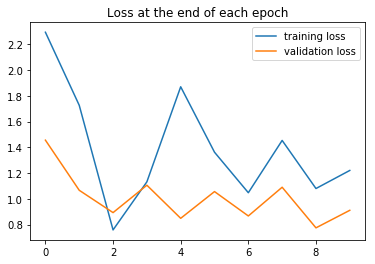

In [58]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend()

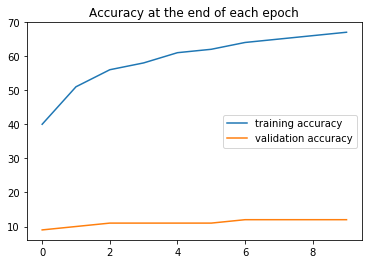

In [59]:
plt.plot([t/500 for t in train_correct], label='training accuracy')
plt.plot([t/500 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [60]:
print(test_correct)

[tensor(4902), tensor(5266), tensor(5645), tensor(5861), tensor(5808), tensor(5933), tensor(6019), tensor(6059), tensor(6074), tensor(6103)]


In [61]:
num_c = test_correct[-1].item()

In [62]:
num_c *100 / 10000

61.03

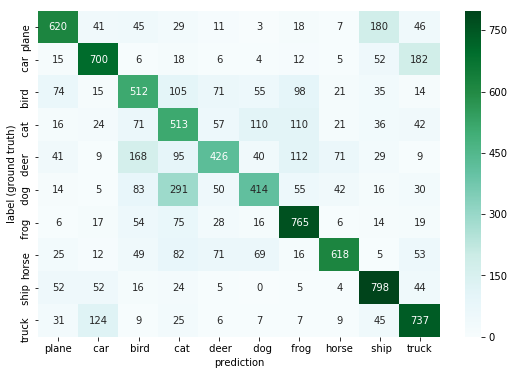

In [63]:
# Create a loader for the entire the test set
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

arr = confusion_matrix(y_test.view(-1), predicted.view(-1))
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();

In [64]:
import os
from PIL import Image
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

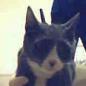

In [65]:
with Image.open("/Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data/CATS_DOGS/test/CAT/10107.jpg") as im:
    display(im)

In [66]:
path = "/Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data/CATS_DOGS/"
img_names = []

for folder,subfolders,filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)

In [67]:
len(img_names)

24996

In [68]:
# Create a data size
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
            
            
    except:
        rejected.append(item)

In [69]:
print(len(img_sizes))
print(len(rejected))

24994
2


In [70]:
df = pd.DataFrame(img_sizes)

In [73]:
df.head()

,0,1
0,365,500
1,484,500
2,448,500
3,500,483
4,500,375


In [72]:
df[0].describe()

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

In [74]:
df[1].describe()

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: 1, dtype: float64

In [75]:
dog = Image.open("/Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data/CATS_DOGS/train/DOG/14.jpg")

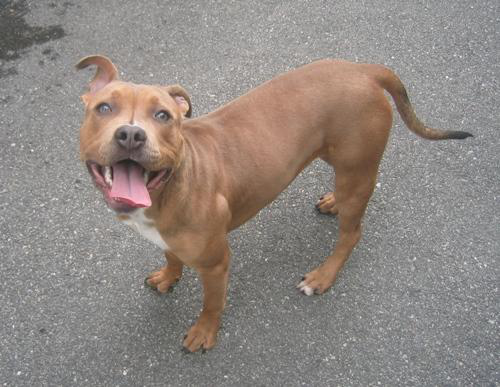

In [76]:
display(dog)

In [77]:
dog.size

(500, 387)

In [78]:
# Pixel range: 0 -- 255
dog.getpixel((0,0))

(90, 95, 98)

In [80]:
transform = transforms.Compose([
    transforms.ToTensor()
])

im = transform(dog)
print(type(im))
print(im.shape)

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


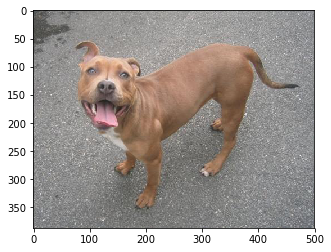

In [82]:
# Need format below to plot an image
# (387,500,3)
# (1,2,0)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [83]:
im

tensor([[[0.3529, 0.3451, 0.3373,  ..., 0.5686, 0.5333, 0.5216],
         [0.3255, 0.3412, 0.3333,  ..., 0.5765, 0.5451, 0.5294],
         [0.2863, 0.3216, 0.3373,  ..., 0.5529, 0.5255, 0.4980],
         ...,
         [0.5765, 0.5451, 0.4824,  ..., 0.5686, 0.5059, 0.5216],
         [0.6157, 0.5922, 0.4941,  ..., 0.5294, 0.5176, 0.5176],
         [0.5922, 0.5843, 0.5020,  ..., 0.5882, 0.6314, 0.6039]],

        [[0.3725, 0.3647, 0.3569,  ..., 0.5725, 0.5373, 0.5255],
         [0.3451, 0.3608, 0.3529,  ..., 0.5804, 0.5490, 0.5333],
         [0.3059, 0.3412, 0.3569,  ..., 0.5569, 0.5294, 0.5020],
         ...,
         [0.5608, 0.5294, 0.4745,  ..., 0.5765, 0.5137, 0.5294],
         [0.6000, 0.5765, 0.4863,  ..., 0.5373, 0.5255, 0.5255],
         [0.5765, 0.5686, 0.4941,  ..., 0.5961, 0.6392, 0.6118]],

        [[0.3843, 0.3765, 0.3686,  ..., 0.5882, 0.5529, 0.5412],
         [0.3569, 0.3725, 0.3647,  ..., 0.5961, 0.5647, 0.5490],
         [0.3176, 0.3529, 0.3686,  ..., 0.5725, 0.5451, 0.

In [84]:
im[:,0,0]

tensor([0.3529, 0.3725, 0.3843])

In [85]:
# Normalization: divide all pixel values by max value
np.array((90,95,98)) / 255

array([0.35294118, 0.37254902, 0.38431373])

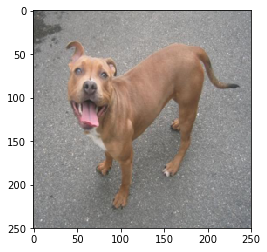

In [89]:
transform = transforms.Compose([
    transforms.Resize((250,250)),
    transforms.CenterCrop(250),
    transforms.ToTensor()
])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

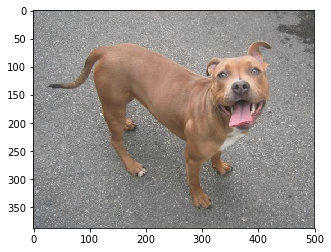

In [94]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.2),     # p: Probability of horizonal flip
    transforms.ToTensor()
])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

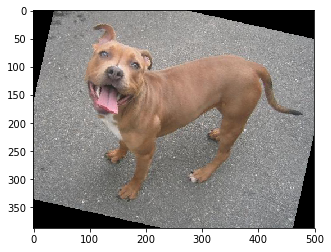

In [95]:
transform = transforms.Compose([
    transforms.RandomRotation(30),          # Random rotate ±30 degree
    transforms.ToTensor()
])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

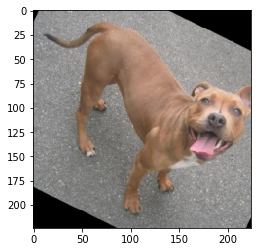

In [96]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomRotation(30),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


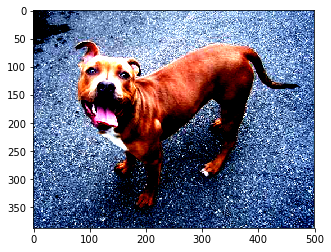

In [98]:
transform = transforms.Compose([
    transforms.ToTensor(),
    # Make convergence happen quicker during training
    # Research has shown this combination of mean and std works well in practice
    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

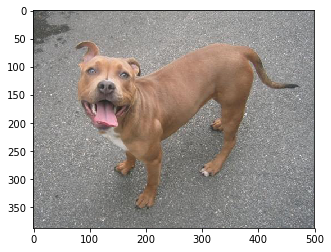

In [99]:
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models # add models to the list
from torchvision.utils import make_grid
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Transform to the same size the network has learned on
train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                        [0.229, 0.224, 0.225])
])

In [3]:
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                        [0.229, 0.224, 0.225])
])

In [4]:
root = "/Users/maximillian/Desktop/求职/Machine Learning/PyTorch/PYTORCH_NOTEBOOKS/Data/CATS_DOGS/"

train_data = datasets.ImageFolder(os.path.join(root,'train'),transform=train_transform)

test_data = datasets.ImageFolder(os.path.join(root,'test'),transform=test_transform)

torch.manual_seed(42)

train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10)

class_names = train_data.classes

In [5]:
class_names

['CAT', 'DOG']

In [6]:
len(train_data)

18743

In [7]:
len(test_data)

6251

In [8]:
for images,labels in train_loader:
    break

In [9]:
images.shape        # 10 images, 3 color channels, each channel is 224x224

torch.Size([10, 3, 224, 224])

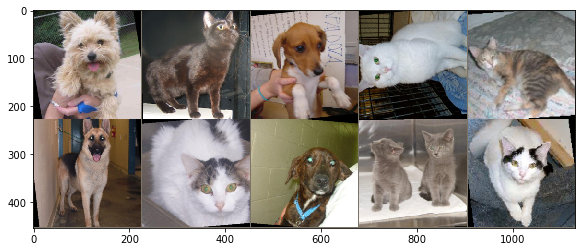

In [10]:
im = make_grid(images,nrow=5)     # 5 images per row

inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1,2,0)))

In [11]:
((224-2)/2-2)/2

54.5

In [12]:
class ConvolutionalNetwork(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(54*54*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,2)
        
    def forward(self,X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,54*54*16)    # 16 54x54 filters
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X,dim=1)

In [13]:
torch.manual_seed(101)
CNNmodel = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(),lr=0.001)

In [14]:
CNNmodel

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [15]:
for p in CNNmodel.parameters():
    print(p.numel())

162
6
864
16
5598720
120
10080
84
168
2


In [16]:
import time
start_time = time.time()

total_time = time.time() - start_time

epochs = 3

# Optional limit number of batches
max_trn_batch = 800 # Each batch has 10 images, so total 8000 images
max_tst_batch = 300 # Total 3000 images

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    for b, (X_train,y_train) in enumerate(train_loader):
        
        # Optional limit number of batches to save time on test network functioning well
        # Comment out when ready to fully train
        if b == max_trn_batch:
            break
            
        b += 1
        
        y_pred = CNNmodel(X_train)
        loss = criterion(y_pred,y_train)
        
        # Count the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200 == 0:
            print(f'Epoch {i} LOSS: {loss.item()}')
            
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    # Test set!
    
    with torch.no_grad():
        for b,(X_test,y_test) in enumerate(test_loader):
            
            # Optional limit number of batches
            if b==max_tst_batch:
                break
                
            y_val = CNNmodel(X_test)
            
            predicted = torch.max(y_pred.data, 1)[1]
            batch_corr = (predicted == y_test).sum()
            tst_corr = tst_corr + batch_corr
            
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        

print(f'Total Time: {total_time/60} minutes')

Epoch 0 LOSS: 0.7233970761299133
Epoch 0 LOSS: 0.8122289776802063
Epoch 0 LOSS: 0.6244469881057739
Epoch 0 LOSS: 0.5736046433448792
Epoch 1 LOSS: 0.428585946559906
Epoch 1 LOSS: 0.869238018989563
Epoch 1 LOSS: 0.7308094501495361
Epoch 1 LOSS: 0.5259054899215698
Epoch 2 LOSS: 0.5414329767227173
Epoch 2 LOSS: 0.23269300162792206
Epoch 2 LOSS: 0.5307667255401611
Epoch 2 LOSS: 0.47104746103286743
Total Time: 4.013379414876302e-07 minutes


In [22]:
torch.save(CNNmodel.state_dict(),'my3epochmodel.pt')

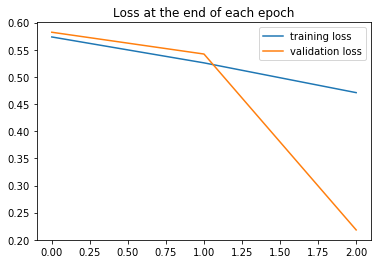

In [17]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

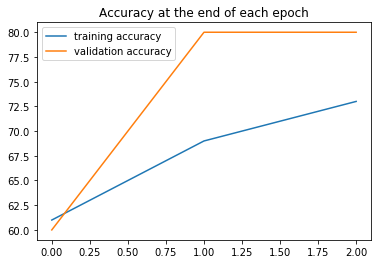

In [18]:
plt.plot([t/80 for t in train_correct], label='training accuracy')
plt.plot([t/30 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [19]:
100*test_correct[-1].item()/3000

80.0

In [20]:
AlexNetmodel = models.alexnet(pretrained=True)

In [21]:
AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [22]:
# Freeze pretrained weights and bias
for param in AlexNetmodel.parameters():
    param.requires_grad = False

In [23]:
torch.manual_seed(42)

AlexNetmodel.classifier = nn.Sequential(nn.Linear(9216,1024),
                                       nn.ReLU(),
                                       nn.Dropout(0.5),
                                       nn.Linear(1024,2),
                                       nn.LogSoftmax(dim=1))

In [24]:
AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5)
    (3): Linear(in_featur

In [25]:
for param in AlexNetmodel.parameters():
    print(param.numel())

23232
64
307200
192
663552
384
884736
256
589824
256
9437184
1024
2048
2


In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(AlexNetmodel.classifier.parameters(),lr=0.001)

In [27]:
import time
start_time = time.time()

epochs = 1

max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        b+=1
        
        # Apply the model
        y_pred = AlexNetmodel(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = AlexNetmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:  200 [  2000/8000]  loss: 4.17486620  accuracy:  86.650%
epoch:  0  batch:  400 [  4000/8000]  loss: 0.02721179  accuracy:  89.750%
epoch:  0  batch:  600 [  6000/8000]  loss: 0.57226795  accuracy:  91.000%
epoch:  0  batch:  800 [  8000/8000]  loss: 0.15490878  accuracy:  91.612%

Duration: 239 seconds


In [28]:
print(test_correct[-1].item()/3000)

0.947


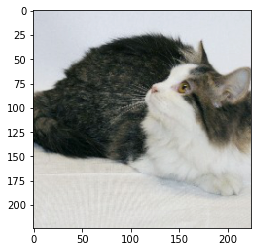

In [35]:
image_index = 2019

im = inv_normalize(test_data[image_index][0])
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [31]:
CNNmodel.eval()

with torch.no_grad():
    new_pred = CNNmodel(test_data[image_index][0].view(1,3,224,224)).argmax()
    
class_names[new_pred.item()]

'CAT'

In [32]:
AlexNetmodel.eval()

with torch.no_grad():
    new_pred = CNNmodel(test_data[image_index][0].view(1,3,224,224)).argmax()
    
class_names[new_pred.item()]

'CAT'